In [1]:
!pip install nibabel
!pip install seaborn
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.9 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 2.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Input
from keras.layers import Convolution3D,Conv3D,Add,concatenate, MaxPool3D,add, Convolution2D,BatchNormalization, GlobalAveragePooling3D, ZeroPadding3D
from tensorflow.keras.layers import Input, Conv3D, BatchNormalization, MaxPool3D, Flatten, Dense, Dropout, concatenate, Lambda, Layer
from keras import backend as K
import cv2
import operator
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD
import nibabel as nib
import pandas as pd
from scipy.ndimage import rotate
import random
import nibabel as nib
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import nibabel as nib
from matplotlib import animation, rc
from scipy.ndimage import rotate
import glob
import os
from sklearn.model_selection import KFold, StratifiedKFold,train_test_split
from scipy.ndimage import zoom
from matplotlib.patches import PathPatch, Rectangle
from IPython.display import HTML
from tensorflow.keras import layers
from sklearn.metrics import roc_auc_score
from tensorflow.keras.layers import Input, Conv3D, BatchNormalization, MaxPool3D, Flatten, Dense, Dropout, concatenate, Lambda, Layer
from tensorflow.keras.models import Model
import tensorflow as tf

E0000 00:00:1724224264.507786      13 common_lib.cc:815] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`=local.
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:531


In [3]:
# Enable TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("Device:", tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Device: 
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


2024-08-21 07:11:18.819284: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:11:18.819404: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:11:18.819490: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:11:18.819559: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:11:18.819633: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:11:18.819823: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-21 07:11:18.819900: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Number of accelerators:  8


## Load 1 fold result

In [4]:
import pandas as pd

# Specify the path to the Excel file
file_path = '/kaggle/input/semi-testtrainval/test_train_vai_set.xlsx'
# Load the Excel file
df = pd.read_excel(file_path)
# z_train

z_train = df.iloc[:, 2]    # Third column
#z_train = z_train.astype(str).str.strip().dropna()
# Convert to NumPy array of strings
#z_train = np.array(z_train)


#z_test
z_test_fixed = df.iloc[:, 0]  # First column
nan_count = z_test_fixed.isna().sum()
z_test = z_test_fixed.dropna()

#z_val
z_val_fixed = df.iloc[:, 1]  # Second column
nan_count_val = z_val_fixed.isna().sum()
z_val = z_val_fixed.dropna()


In [5]:
luna_df = pd.read_excel('/kaggle/input/spie-cropped-resampled-dataset/final_Luna16.xlsx')
luna_1_df= pd.read_excel('/kaggle/input/semi-testtrainval/combined_correct_predictions.xlsx')

column_luna = 'malignancy'
luna_series=luna_df['Series Uid'].tolist()

luna_folder = '/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled'  
luna = []
for i in luna_series:
    nii_file_path = os.path.join(luna_folder, f'{i}.nii')  # Assuming NII files have the extension '.nii'
    
    if os.path.exists(nii_file_path):
        luna.append(i)
luna=np.array(luna)

print(luna.shape)

(557,)


In [6]:
def aug_rotate(x):

    rotated_slices = []
    for slice_idx in range(x.shape[2]):
        slice_data = x[:, :, slice_idx]  # Extract a single slice
        rotated_slice = rotate(slice_data, angle=angles[j], reshape=False, mode='nearest')
        rotated_slices.append(rotated_slice)

    # Create a new NIfTI image from the rotated slices
    rotated_img_data = np.stack(rotated_slices, axis=-1)
    # Create a new NIfTI image using the header information from the original image
    rotated_nifti = nib.Nifti1Image(rotated_img_data, img.affine)
    
    return rotated_nifti

In [7]:
datas_test = []
labels_test = []
scans_test = []

datas_train = []
labels_train = []
scans_train = []

datas_val = []
labels_val = []
scans_val = []
angles = [0, 45, 90, 135, 180, 225, 270, 315]

for i in z_train:
    # Search for the label in luna_df
    if i in luna_df['Series Uid'].values:
        lab = luna_df.loc[luna_df['Series Uid'] == i, 'malignancy'].values[0]
    # If not found, search in luna_df_1
    elif i in luna_1_df['scan'].values:
        lab = luna_1_df.loc[luna_1_df['scan'] == i, 'malignancy'].values[0]
    else:
        raise ValueError(f"Series Uid {i} not found in luna_df or luna_1_df.")

    img_files = glob.glob(os.path.join(luna_folder, f"{i}.nii"))
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()

        for j in range(len(angles)):
            rotated_nifti = aug_rotate(data)
            datas_train.append(rotated_nifti.get_fdata())
            labels_train.append(lab)

for i in z_val:
    lab = luna_df.loc[luna_df['Series Uid'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join(luna_folder, f"{i}.nii"))
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()
        datas_val.append(data)
        labels_val.append(lab)

for i in z_test:
    if i in luna_df['Series Uid'].values:
        lab = luna_df.loc[luna_df['Series Uid'] == i, 'malignancy'].values[0]
    elif i in luna_df_1['Series Uid'].values:
        lab = luna_df_1.loc[luna_df_1['Series Uid'] == i, 'malignancy'].values[0]
    else:
        raise ValueError(f"Series Uid {i} not found in luna_df or luna_df_1.")

    img_files = glob.glob(os.path.join(luna_folder, f"{i}.nii"))
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()
        datas_test.append(data)
        labels_test.append(lab)

X_train = np.array(datas_train)
y_train = np.array(labels_train)
X_test = np.array(datas_test)
y_test = np.array(labels_test)
X_val = np.array(datas_val)
y_val = np.array(labels_val)

print(y_train.shape, y_test.shape, y_val.shape)
print(X_train.shape, X_test.shape, X_val.shape)


(7688,) (112,) (89,)
(7688, 32, 32, 32) (112, 32, 32, 32) (89, 32, 32, 32)


## Run parameter

In [8]:
BS= 68 # batch size
E = 200 #epoch

#lr_callback = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',factor=0.001,patience=5,min_lr=1e-6)
FACTOR = 0.001
PATIENCE=5
MIN_LR=1e-6

### Model

In [9]:
def define_model():
    model = Sequential()
    model.add(Conv3D(32,(3,3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(32,32,32,1)))
    model.add(BatchNormalization())
    model.add(Conv3D(32, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))
    #model.add(Dropout(0.1))
    
    model.add(Conv3D(64, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(64, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))
    #model.add(Dropout(0.2))
    
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))

    model.add(Conv3D(256, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(256, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    #model.add(MaxPool3D((2, 2,2))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    #model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))


    model.add(Dense(1, activation='sigmoid', kernel_initializer='he_uniform'));
    return model

# HU
### without original input as a branch

In [11]:
# Model
def conv_block(inputs):
    x = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    
    x = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    x = Dropout(0.3)(x)
    
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    
    x = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool3D((2, 2, 2))(x)
    x = Dropout(0.5)(x)
    
    x = Flatten()(x)
    
    return x

## Dividing into 4 branches random initializer

In [13]:
from tensorflow.keras.constraints import Constraint
class RangeConstraint(Constraint):
    def __init__(self, min_value=0.0, max_value=1.0):
        self.min_value = min_value
        self.max_value = max_value

    def __call__(self, w):
        return tf.clip_by_value(w, self.min_value, self.max_value)

    def get_config(self):
        return {'min_value': self.min_value, 'max_value': self.max_value}


# Custom layer with trainable variables
class LearnableDynamicRange(Layer):
    def __init__(self, **kwargs):
        # Use the provided name or the default name if not provided
        name = kwargs.pop('name', 'learnable_dynamic_range')
        super(LearnableDynamicRange, self).__init__(name=name, **kwargs)

        # Define trainable variables with initial values
        self.a = self.add_weight(
            name='a',
            shape=(1,),
            initializer=tf.random_uniform_initializer(minval=0.0, maxval=1.0),
            constraint=RangeConstraint(min_value=0.1, max_value=0.3),
            trainable=True
        )
        self.b = self.add_weight(
            name='b',
            shape=(1,),
            initializer=tf.random_uniform_initializer(minval=0.0, maxval=1.0),
            constraint=RangeConstraint(min_value=0.4, max_value=0.6),
            trainable=True
        )
        
        self.c = self.add_weight(
            name='c',
            shape=(1,),
            initializer=tf.random_uniform_initializer(minval=0.0, maxval=1.0),
            constraint=RangeConstraint(min_value=0.7, max_value=0.9),
            trainable=True
        )
        
        
    def call(self, inputs):
        a_layer = tf.where(inputs > self.a, 1.0, inputs / self.a)
        b_layer = tf.clip_by_value(tf.where(inputs > self.b, 1.0, (inputs - self.a) / (self.b - self.a)), 0, 1)
        c_layer = tf.clip_by_value(tf.where(inputs > self.c, 1.0, (inputs - self.b) / (self.c - self.b)), 0, 1)
        d_layer = tf.clip_by_value((inputs - self.c) / (1 - self.c), 0, 1)

        return a_layer, b_layer, c_layer, d_layer



def define_model5():
    input_shape = (32, 32, 32, 1)
    input_data = Input(shape=input_shape)

    # Use the custom layer with trainable variables
    dynamic_range_layer = LearnableDynamicRange()(input_data)
    a_layer, b_layer, c_layer,d_layer = dynamic_range_layer

    branch_a = conv_block(a_layer)
    branch_b = conv_block(b_layer)
    branch_c = conv_block(c_layer)
    branch_d = conv_block(d_layer)

    
    concatenated_branches = concatenate([branch_a, branch_b, branch_c,branch_d])

    x = Dense(128, activation='relu', kernel_initializer='he_uniform')(concatenated_branches)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(8, activation='relu', kernel_initializer='he_uniform')(x)

    output_layer = Dense(1, activation='sigmoid', kernel_initializer='he_uniform')(x)

    model = Model(inputs=input_data, outputs=output_layer)

    return model

In [14]:
with strategy.scope():
    model=define_model5()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=FACTOR,patience=PATIENCE,min_lr=MIN_LR)
checkpoint_callback = ModelCheckpoint('Luna_train5.h5', monitor='val_accuracy',save_best_only=True, save_format='tf')

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync


history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[checkpoint_callback,lr_callback],verbose=0)
    

best_model5 = tf.keras.models.load_model('Luna_train5.h5', custom_objects={'LearnableDynamicRange': LearnableDynamicRange})

loss5, accuracy5 = best_model5.evaluate(X_test, y_test)
print('accuracy: ',accuracy5*100)
print('loss: ',loss5*100)

print('-----------------------------------------------------------------')
a_value = best_model5.get_layer('learnable_dynamic_range').a.numpy()
b_value = best_model5.get_layer('learnable_dynamic_range').b.numpy()
c_value = best_model5.get_layer('learnable_dynamic_range').c.numpy()
 
print("Value of 'a' in the best model:", a_value)
print("Value of 'b' in the best model:", b_value)
print("Value of 'c' in the best model:", c_value)

2024-08-21 07:34:53.025460: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-21 07:36:52.102162: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


4/4 [==============================] - 4s 629ms/step - loss: 0.3435 - accuracy: 0.8929
accuracy:  89.28571343421936
loss:  34.346142411231995
-----------------------------------------------------------------
Value of 'a' in the best model: [0.29805964]
Value of 'b' in the best model: [0.591406]
Value of 'c' in the best model: [0.70639056]


4/4 [==============================] - 4s 615ms/step
Classification Report:
               precision    recall  f1-score   support

      benign    0.94118   0.84211   0.88889        57
   malignant    0.85246   0.94545   0.89655        55

    accuracy                        0.89286       112
   macro avg    0.89682   0.89378   0.89272       112
weighted avg    0.89761   0.89286   0.89265       112

AUC: 0.9441786283891548


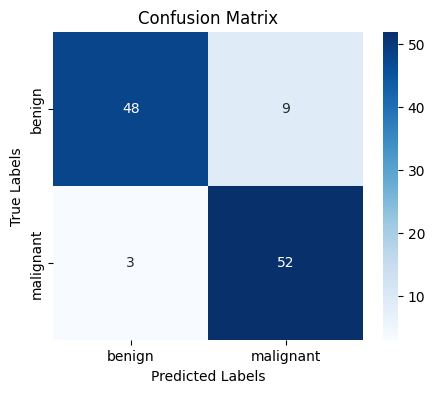

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


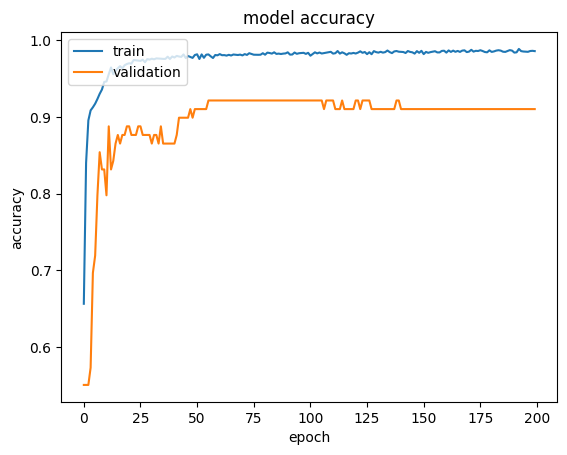

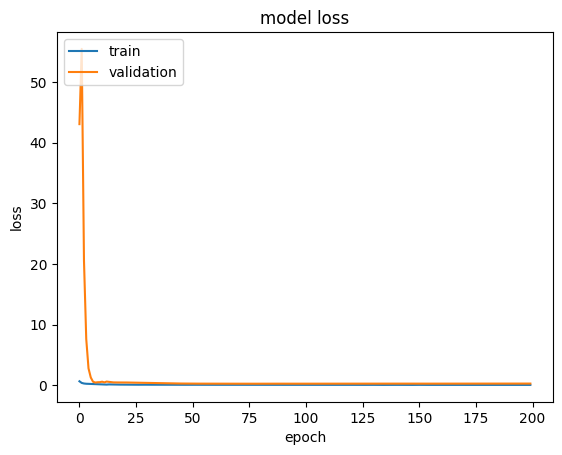

In [15]:

predictions5 = best_model5.predict(X_test)
predicted_classes = (predictions5 > 0.5).astype(int)


# Generate the classification report
class_names = list(['benign','malignant'])
report = classification_report(y_test, predicted_classes , target_names=class_names,digits=5)
print("Classification Report:\n", report)

# Calculate AUC
auc = roc_auc_score(y_test, predictions5)
print(f'AUC: {auc}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Dividing into 4 branches constant initializer

In [16]:
# Custom layer with trainable variables
class LearnableDynamicRange(Layer):
    def __init__(self, initial_a, initial_b,initial_c, **kwargs):
        # Use the provided name or the default name if not provided
        name = kwargs.pop('name', 'learnable_dynamic_range')
        super(LearnableDynamicRange, self).__init__(name=name, **kwargs)

        # Define trainable variables with initial values
        self.a = self.add_weight(
            name='a',
            shape=(1,),
            initializer=tf.constant_initializer(value=initial_a),
            trainable=True
        )
        self.b = self.add_weight(
            name='b',
            shape=(1,),
            initializer=tf.constant_initializer(value=initial_b),
            trainable=True
        )
        
        self.c = self.add_weight(
            name='c',
            shape=(1,),
            initializer=tf.constant_initializer(value=initial_c),
            trainable=True
        )


    def call(self, inputs):
        # Modify a_layer to ensure x > a is 1
        a_layer = tf.where(inputs > self.a, 1.0, inputs / self.a)
        b_layer = tf.clip_by_value(tf.where(inputs > self.b, 1.0, (inputs - self.a) / (self.b - self.a)), 0, 1)
        c_layer = tf.clip_by_value(tf.where(inputs > self.c, 1.0, (inputs - self.b) / (self.c - self.b)), 0, 1)
        d_layer = tf.clip_by_value((inputs - self.c) / (1 - self.c), 0, 1)


        return a_layer, b_layer, c_layer, d_layer



def define_model6(initial_a, initial_b,initial_c):
    input_shape = (32, 32, 32, 1)
    input_data = Input(shape=input_shape)

    # Use the custom layer with trainable variables
    dynamic_range_layer = LearnableDynamicRange(initial_a=initial_a, initial_b=initial_b,initial_c=initial_c)(input_data)
    a_layer, b_layer, c_layer,d_layer = dynamic_range_layer

    branch_a = conv_block(a_layer)
    branch_b = conv_block(b_layer)
    branch_c = conv_block(c_layer)
    branch_d = conv_block(d_layer)

    concatenated_branches = concatenate([branch_a, branch_b, branch_c,branch_d])

    x = Dense(128, activation='relu', kernel_initializer='he_uniform')(concatenated_branches)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(8, activation='relu', kernel_initializer='he_uniform')(x)

    output_layer = Dense(1, activation='sigmoid', kernel_initializer='he_uniform')(x)

    model = Model(inputs=input_data, outputs=output_layer)

    return model

In [17]:
with strategy.scope():
    model=define_model6(0.25,0.5,0.75)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=FACTOR,patience=PATIENCE,min_lr=MIN_LR)
checkpoint_callback = ModelCheckpoint('Luna_train6.h5', monitor='val_accuracy',save_best_only=True, save_format='tf')

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync


history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[checkpoint_callback,lr_callback],verbose=0)
    

best_model6 = tf.keras.models.load_model('Luna_train6.h5', custom_objects={'LearnableDynamicRange': LearnableDynamicRange})

loss6, accuracy6 = best_model6.evaluate(X_test, y_test)
print('accuracy: ',accuracy6*100)
print('loss: ',loss6*100)


print('-----------------------------------------------------------------')
a_value = best_model6.get_layer('learnable_dynamic_range').a.numpy()
b_value = best_model6.get_layer('learnable_dynamic_range').b.numpy()
c_value = best_model6.get_layer('learnable_dynamic_range').c.numpy()
 
print("Value of 'a' in the best model:", a_value)
print("Value of 'b' in the best model:", b_value)
print("Value of 'c' in the best model:", c_value)

2024-08-21 08:09:29.519348: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-21 08:11:37.188653: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 4s 645ms/step - loss: 0.5581 - accuracy: 0.8661
accuracy:  86.60714030265808
loss:  55.80562353134155
-----------------------------------------------------------------
Value of 'a' in the best model: [0.26520723]
Value of 'b' in the best model: [0.49870127]
Value of 'c' in the best model: [0.7562839]


4/4 [==============================] - 4s 632ms/step
Classification Report:
               precision    recall  f1-score   support

      benign    0.92000   0.80702   0.85981        57
   malignant    0.82258   0.92727   0.87179        55

    accuracy                        0.86607       112
   macro avg    0.87129   0.86715   0.86580       112
weighted avg    0.87216   0.86607   0.86570       112

AUC: 0.9256778309409887


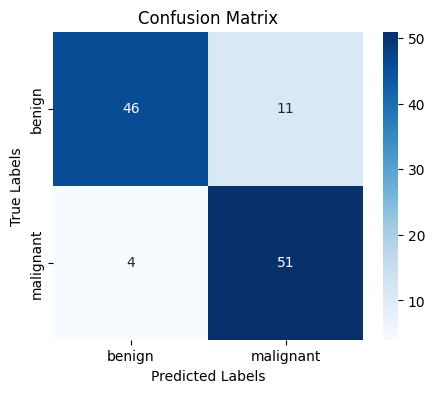

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


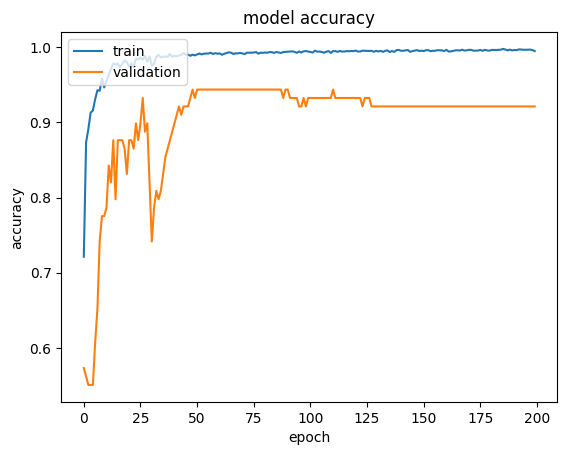

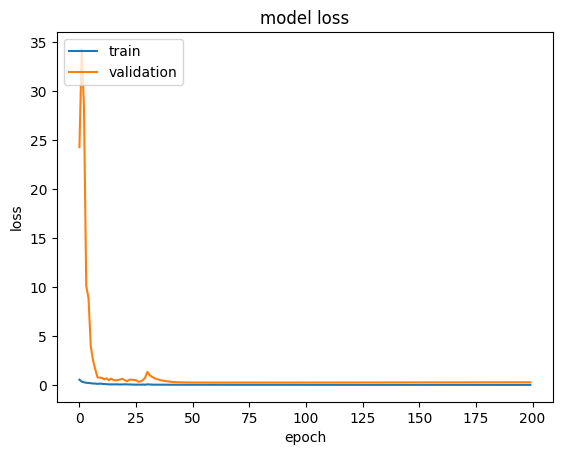

In [18]:

predictions6 = best_model6.predict(X_test)
predicted_classes = (predictions6 > 0.5).astype(int)


# Generate the classification report
class_names = list(['benign','malignant'])
report = classification_report(y_test, predicted_classes , target_names=class_names,digits=5)
print("Classification Report:\n", report)

# Calculate AUC
auc = roc_auc_score(y_test, predictions6)
print(f'AUC: {auc}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Dividing into 5 branches random initializer

In [19]:
class RangeConstraint(Constraint):
    def __init__(self, min_value=0.0, max_value=1.0):
        self.min_value = min_value
        self.max_value = max_value

    def __call__(self, w):
        return tf.clip_by_value(w, self.min_value, self.max_value)

    def get_config(self):
        return {'min_value': self.min_value, 'max_value': self.max_value}


# Custom layer with trainable variables
class LearnableDynamicRange(Layer):
    def __init__(self, **kwargs):
        # Use the provided name or the default name if not provided
        name = kwargs.pop('name', 'learnable_dynamic_range')
        super(LearnableDynamicRange, self).__init__(name=name, **kwargs)

        # Define trainable variables with initial values
        self.a = self.add_weight(
            name='a',
            shape=(1,),
            initializer=tf.random_uniform_initializer(minval=0.0, maxval=1.0),
            constraint=RangeConstraint(min_value=0.05, max_value=0.25),
            trainable=True
        )
        self.b = self.add_weight(
            name='b',
            shape=(1,),
            initializer=tf.random_uniform_initializer(minval=0.0, maxval=1.0),
            constraint=RangeConstraint(min_value=0.3, max_value=0.5),
            trainable=True
        )
        
        self.c = self.add_weight(
            name='c',
            shape=(1,),
            initializer=tf.random_uniform_initializer(minval=0.0, maxval=1.0),
            constraint=RangeConstraint(min_value=0.55, max_value=0.7),
            trainable=True
        )
        
        self.d = self.add_weight(
            name='d',
            shape=(1,),
            initializer=tf.random_uniform_initializer(minval=0.0, maxval=1.0),
            constraint=RangeConstraint(min_value=0.75, max_value=0.95),
            trainable=True
        )
        
    def call(self, inputs):
        # Modify a_layer to ensure x > a is 1
        a_layer = tf.where(inputs > self.a, 1.0, inputs / self.a)
        b_layer = tf.clip_by_value(tf.where(inputs > self.b, 1.0, (inputs - self.a) / (self.b - self.a)), 0, 1)
        c_layer = tf.clip_by_value(tf.where(inputs > self.c, 1.0, (inputs - self.b) / (self.c - self.b)), 0, 1)
        d_layer = tf.clip_by_value(tf.where(inputs > self.d, 1.0, (inputs - self.c) / (self.d - self.c)), 0, 1)
        e_layer = tf.clip_by_value((inputs - self.d) / (1 - self.d), 0, 1)


        return a_layer, b_layer, c_layer, d_layer, e_layer

def define_model7():
    input_shape = (32, 32, 32, 1)
    input_data = Input(shape=input_shape)

    # Use the custom layer with trainable variables
    dynamic_range_layer = LearnableDynamicRange()(input_data)
    a_layer, b_layer, c_layer, d_layer, e_layer = dynamic_range_layer

    branch_a = conv_block(a_layer)
    branch_b = conv_block(b_layer)
    branch_c = conv_block(c_layer)
    branch_d = conv_block(d_layer)
    branch_e = conv_block(e_layer)

    

    concatenated_branches = concatenate([branch_a, branch_b, branch_c, branch_d, branch_e])

    x = Dense(128, activation='relu', kernel_initializer='he_uniform')(concatenated_branches)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(8, activation='relu', kernel_initializer='he_uniform')(x)

    output_layer = Dense(1, activation='sigmoid', kernel_initializer='he_uniform')(x)

    model = Model(inputs=input_data, outputs=output_layer)

    return model

In [20]:
with strategy.scope():
    model=define_model7()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=FACTOR,patience=PATIENCE,min_lr=MIN_LR)
checkpoint_callback = ModelCheckpoint('Luna_train7.h5', monitor='val_accuracy',save_best_only=True, save_format='tf')

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync


history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[checkpoint_callback,lr_callback],verbose=0)
    

best_model7 = tf.keras.models.load_model('Luna_train7.h5', custom_objects={'LearnableDynamicRange': LearnableDynamicRange})

loss7, accuracy7 = best_model7.evaluate(X_test, y_test)
print('accuracy: ',accuracy7*100)
print('loss: ',loss7*100)


print('-----------------------------------------------------------------')
a_value = best_model7.get_layer('learnable_dynamic_range').a.numpy()
b_value = best_model7.get_layer('learnable_dynamic_range').b.numpy()
c_value = best_model7.get_layer('learnable_dynamic_range').c.numpy()
d_value = best_model7.get_layer('learnable_dynamic_range').d.numpy()
 
print("Value of 'a' in the best model:", a_value)
print("Value of 'b' in the best model:", b_value)
print("Value of 'c' in the best model:", c_value)
print("Value of 'd' in the best model:", d_value)

2024-08-21 08:45:50.091360: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-21 08:48:09.959748: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 5s 796ms/step - loss: 0.5322 - accuracy: 0.8304
accuracy:  83.03571343421936
loss:  53.22487950325012
-----------------------------------------------------------------
Value of 'a' in the best model: [0.25]
Value of 'b' in the best model: [0.3]
Value of 'c' in the best model: [0.5554318]
Value of 'd' in the best model: [0.75923616]


4/4 [==============================] - 5s 832ms/step
Classification Report:
               precision    recall  f1-score   support

      benign    0.86538   0.78947   0.82569        57
   malignant    0.80000   0.87273   0.83478        55

    accuracy                        0.83036       112
   macro avg    0.83269   0.83110   0.83024       112
weighted avg    0.83328   0.83036   0.83015       112

AUC: 0.9189792663476875


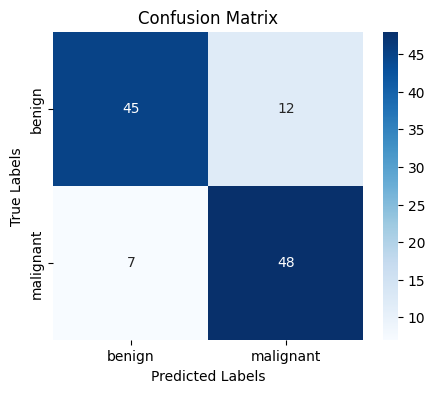

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


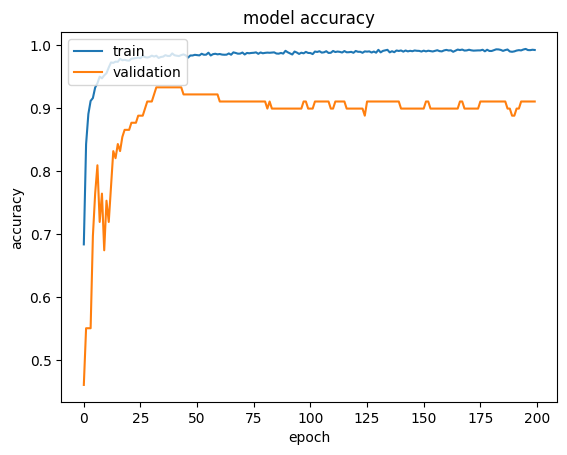

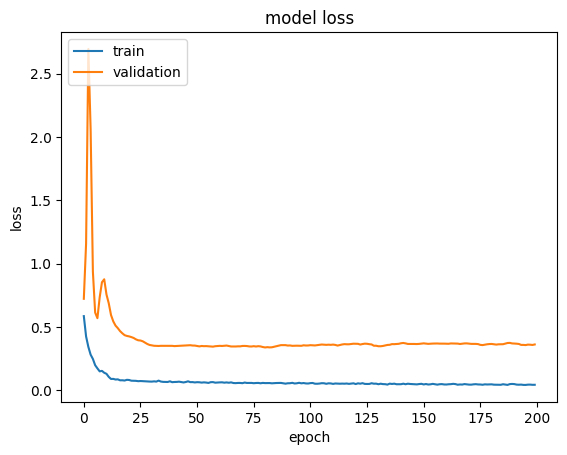

In [21]:

predictions7 = best_model7.predict(X_test)
predicted_classes = (predictions7 > 0.5).astype(int)

# Generate the classification report
class_names = list(['benign','malignant'])
report = classification_report(y_test, predicted_classes , target_names=class_names,digits=5)
print("Classification Report:\n", report)

# Calculate AUC
auc = roc_auc_score(y_test, predictions7)
print(f'AUC: {auc}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Dividing into 5 branches constant initializer

In [22]:
# Custom layer with trainable variables
class LearnableDynamicRange(Layer):
    def __init__(self, initial_a, initial_b,initial_c,initial_d, **kwargs):
        # Use the provided name or the default name if not provided
        name = kwargs.pop('name', 'learnable_dynamic_range')
        super(LearnableDynamicRange, self).__init__(name=name, **kwargs)

        # Define trainable variables with initial values
        self.a = self.add_weight(
            name='a',
            shape=(1,),
            initializer=tf.constant_initializer(value=initial_a),
            trainable=True
        )
        self.b = self.add_weight(
            name='b',
            shape=(1,),
            initializer=tf.constant_initializer(value=initial_b),
            trainable=True
        )
        
        self.c = self.add_weight(
            name='c',
            shape=(1,),
            initializer=tf.constant_initializer(value=initial_c),
            trainable=True
        )
        
        self.d = self.add_weight(
            name='d',
            shape=(1,),
            initializer=tf.constant_initializer(value=initial_d),
            trainable=True
        )

    def call(self, inputs):
        # Modify a_layer to ensure x > a is 1
        a_layer = tf.where(inputs > self.a, 1.0, inputs / self.a)
        b_layer = tf.clip_by_value(tf.where(inputs > self.b, 1.0, (inputs - self.a) / (self.b - self.a)), 0, 1)
        c_layer = tf.clip_by_value(tf.where(inputs > self.c, 1.0, (inputs - self.b) / (self.c - self.b)), 0, 1)
        d_layer = tf.clip_by_value(tf.where(inputs > self.d, 1.0, (inputs - self.c) / (self.d - self.c)), 0, 1)
        e_layer = tf.clip_by_value((inputs - self.d) / (1 - self.d), 0, 1)


        return a_layer, b_layer, c_layer, d_layer, e_layer

def define_model8(initial_a, initial_b,initial_c,initial_d):
    input_shape = (32, 32, 32, 1)
    input_data = Input(shape=input_shape)

    # Use the custom layer with trainable variables
    dynamic_range_layer = LearnableDynamicRange(initial_a=initial_a, initial_b=initial_b,
                                                initial_c=initial_c,initial_d=initial_d)(input_data)
    a_layer, b_layer, c_layer, d_layer, e_layer = dynamic_range_layer

    branch_a = conv_block(a_layer)
    branch_b = conv_block(b_layer)
    branch_c = conv_block(c_layer)
    branch_d = conv_block(d_layer)
    branch_e = conv_block(e_layer)

    

    concatenated_branches = concatenate([branch_a, branch_b, branch_c, branch_d, branch_e])

    x = Dense(128, activation='relu', kernel_initializer='he_uniform')(concatenated_branches)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu', kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Dense(8, activation='relu', kernel_initializer='he_uniform')(x)

    output_layer = Dense(1, activation='sigmoid', kernel_initializer='he_uniform')(x)

    model = Model(inputs=input_data, outputs=output_layer)

    return model

In [23]:
with strategy.scope():
    model=define_model8(0.2,0.4,0.6,0.8)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=FACTOR,patience=PATIENCE,min_lr=MIN_LR)
checkpoint_callback = ModelCheckpoint('Luna_train8.h5', monitor='val_accuracy',save_best_only=True, save_format='tf')

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync


history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[checkpoint_callback,lr_callback],verbose=0)
    

best_model8 = tf.keras.models.load_model('Luna_train8.h5', custom_objects={'LearnableDynamicRange': LearnableDynamicRange})

loss8, accuracy8 = best_model8.evaluate(X_test, y_test)
print('accuracy: ',accuracy8*100)
print('loss: ',loss8*100)


print('-----------------------------------------------------------------')
a_value = best_model8.get_layer('learnable_dynamic_range').a.numpy()
b_value = best_model8.get_layer('learnable_dynamic_range').b.numpy()
c_value = best_model8.get_layer('learnable_dynamic_range').c.numpy()
d_value = best_model8.get_layer('learnable_dynamic_range').d.numpy()
 
print("Value of 'a' in the best model:", a_value)
print("Value of 'b' in the best model:", b_value)
print("Value of 'c' in the best model:", c_value)
print("Value of 'd' in the best model:", d_value)

2024-08-21 09:25:17.514912: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-21 09:27:40.116947: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 5s 803ms/step - loss: 0.4062 - accuracy: 0.8661
accuracy:  86.60714030265808
loss:  40.61931073665619
-----------------------------------------------------------------
Value of 'a' in the best model: [0.20135678]
Value of 'b' in the best model: [0.3815341]
Value of 'c' in the best model: [0.5715706]
Value of 'd' in the best model: [0.8203092]


4/4 [==============================] - 5s 841ms/step
Classification Report:
               precision    recall  f1-score   support

      benign    0.92000   0.80702   0.85981        57
   malignant    0.82258   0.92727   0.87179        55

    accuracy                        0.86607       112
   macro avg    0.87129   0.86715   0.86580       112
weighted avg    0.87216   0.86607   0.86570       112

AUC: 0.9291866028708134


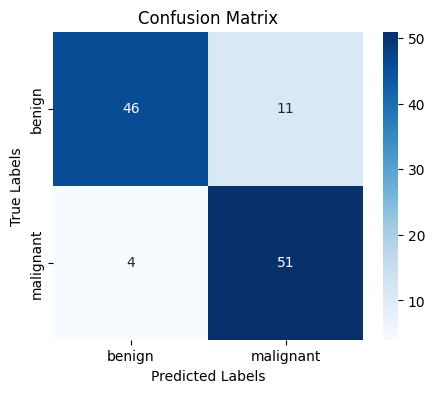

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


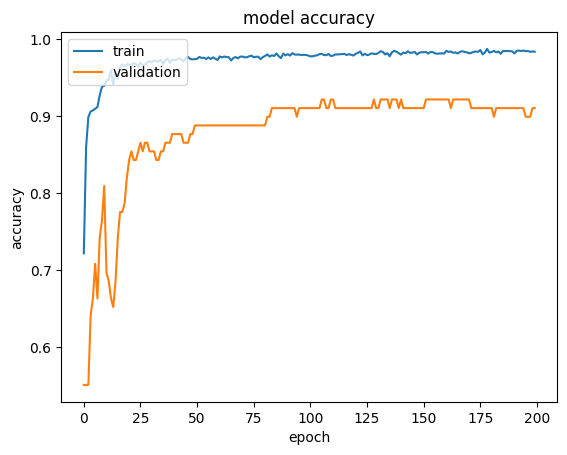

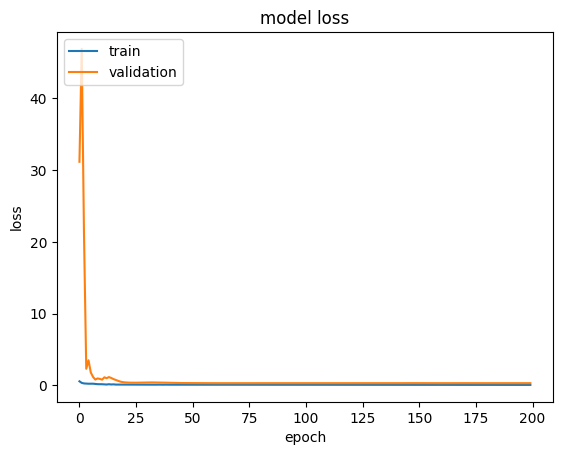

In [24]:

predictions8 = best_model8.predict(X_test)
predicted_classes = (predictions8 > 0.5).astype(int)

# Generate the classification report
class_names = list(['benign','malignant'])
report = classification_report(y_test, predicted_classes , target_names=class_names,digits=5)
print("Classification Report:\n", report)

# Calculate AUC
auc = roc_auc_score(y_test, predictions8)
print(f'AUC: {auc}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()